# **UAS NLP 2025**

|NAMA|NIM|
|-|-|
|Muhammad Abdul Ghofur|11220940000020|
|Alif Alamsyah|11220940000028|

# **Perbandingan RNN dan LSTM pada Klasifikasi Sentimen IMDB**

# **Latar Belakang**

Review film memuat opini pengguna yang sangat berharga, baik bagi calon penonton maupun industri film, karena dapat memengaruhi keputusan dan memberikan gambaran kualitas film. Namun, banyak review memiliki panjang yang bervariasi, dengan gaya bahasa yang kompleks, sehingga dibutuhkan model yang mampu memahami konteks dari awal hingga akhir kalimat. RNN tradisional sering mengalami kesulitan, terutama karena masalah vanishing gradient yang membuatnya sulit mengingat informasi dari kata-kata yang jauh. Untuk mengatasi hal ini, LSTM diperkenalkan dengan mekanisme khusus yang mampu mempertahankan informasi jangka panjang dan mengalirkan sinyal pembelajaran secara lebih stabil.

**Tujuan utama** dari projek ini adalah membandingkan kinerja RNN dan LSTM dalam melakukan klasifikasi sentimen pada dataset IMDB. Kami juga ingin melihat seberapa baik kedua model ini mampu memahami dan memproses review dengan panjang yang bervariasi, khususnya review yang cukup panjang dan kompleks. Selain itu, kami menganalisis stabilitas gradient selama proses pelatihan, untuk memahami bagaimana masing-masing model mempertahankan kualitas pembelajaran ketika dihadapkan pada urutan kata yang panjang.

Dataset yang kami gunakan yaitu berasal dari dataset IMDB berisi kumpulan review film yang panjang dengan gaya bahasa yang bervariasi dan sering kali tidak baku. Banyak review mengandung simbol, bahasa campuran, hingga ekspresi emosional yang ekstrem, menjadikannya tantangan tersendiri bagi model pemrosesan bahasa alami. Dataset ini terdiri dari lima puluh ribu review yang seimbang, dengan proporsi lima puluh persen positif dan lima puluh persen negatif. Keseimbangan ini sangat penting karena memastikan eksperimen tidak mengalami bias terhadap salah satu kelas sentimen.

Sebagai contoh, review positif biasanya berbunyi, 'This is a good film, very funny,' sedangkan review negatif dapat terdengar sangat emosional, seperti 'Worst movie ever… mentally scarred!' Perbedaan gaya bahasa dan nada seperti ini sangat membantu model dalam mengenali pola sentimen dengan lebih jelas dan membedakan nuansa positif maupun negatif secara akurat.

Alur kerja proyek kami meliputi beberapa tahap utama, yaitu:

1. **Eksplorasi Data** – memahami karakteristik review, seperti distribusi sentimen, panjang teks, dan kosakata yang dominan.
2. **Preprocessing Teks** – membersihkan data, melakukan tokenisasi, serta menyiapkan teks dalam format numerik.
3. **Pemisahan Data** – membagi dataset menjadi train, validasi, dan test agar evaluasi model lebih objektif.
4. **Pembangunan Model** – membangun dua arsitektur berbeda, yaitu RNN dan LSTM, dengan parameter yang serupa.
5. **Training Model** – melatih kedua model pada dataset yang sama.
6. **Evaluasi** – mengukur kinerja model dengan metrik akurasi, loss, dan analisis hasil pada data uji.
7. **Analisis Hasil** – membandingkan performa RNN dan LSTM, serta menilai kelebihan dan kekurangan masing-masing."



# **Import Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import string
import nltk
import time
import re
import os
import requests
import spacy
import random
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import word_tokenize, pos_tag
from scipy.sparse import hstack
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob
from tqdm import tqdm

sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')

np.random.seed(1611)
plt.style.use('default')    # Reset style matplotlib
plt.rcdefaults()            # Reset rcParams ke default
sns.reset_defaults()        # Reset style seaborn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import torch

# Cek apakah CUDA tersedia
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device yang digunakan: {device}")


Device yang digunakan: cuda


In [ ]:
import os
import warnings
import nltk
import urllib.request

warnings.simplefilter('ignore')

# Pastikan folder 'data' tersedia
if not os.path.exists('data'):
    os.mkdir('data')

# File dan URL sumber data dari taudata
file_urls = {
    'taudataNlpTm.py': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/taudataNlpTm.py',
    'data/slang.txt': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/slang.txt',
    'data/stopwords_id.txt': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/stopwords_id.txt',
    'data/stopwords_en.txt': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/stopwords_en.txt',
    'data/kata_dasar.txt': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/kata_dasar.txt',
    'data/wn-ind-def.tab': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/wn-ind-def.tab',
    'data/wn-msa-all.tab': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/wn-msa-all.tab',
    'data/ind_SA.csv': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/ind_SA.csv',
    'data/all_indo_man_tag_corpus_model.crf.tagger': 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/all_indo_man_tag_corpus_model.crf.tagger'
}

# Download file jika belum ada
for filename, url in file_urls.items():
    if not os.path.exists(filename):
        print(f"Mengunduh {filename}...")
        urllib.request.urlretrieve(url, filename)

# Install package Python (gunakan pip langsung di terminal jika ini error)
try:
    import spacy
    import textblob
    import unidecode
    import sastrawi
    import sklearn_crfsuite
except ImportError:
    print("Beberapa modul belum terinstal. Silakan jalankan perintah ini di terminal:")
    print("pip install spacy python-crfsuite unidecode textblob sastrawi")
    print("python -m spacy download xx")
    print("python -m spacy download en_core_web_sm")

# Download resource NLTK
nltk.download('popular')

print("Instalasi lokal selesai. Semua file dan dependensi siap.")


Mengunduh taudataNlpTm.py...
Mengunduh data/slang.txt...
Mengunduh data/stopwords_id.txt...
Mengunduh data/stopwords_en.txt...
Mengunduh data/kata_dasar.txt...
Mengunduh data/wn-ind-def.tab...
Mengunduh data/wn-msa-all.tab...
Mengunduh data/ind_SA.csv...
Mengunduh data/all_indo_man_tag_corpus_model.crf.tagger...
Beberapa modul belum terinstal. Silakan jalankan perintah ini di terminal:
pip install spacy python-crfsuite unidecode textblob sastrawi
python -m spacy download xx
python -m spacy download en_core_web_sm


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Instalasi lokal selesai. Semua file dan dependensi siap.


[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection popular


In [ ]:
# Download resource NLTK (hanya perlu sekali)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') # This one might be enough, but eng is specific
nltk.download('averaged_perceptron_tagger_eng') # Add this line to be sure
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# PreProcessing


## Data sebelum Cleaning Text

In [ ]:
path_file_dirt ='https://drive.google.com/uc?export=download&id=1P3eW3pvr3cjzCIY_E5HJ-joNXlVyGAIs'
df_dirt = pd.read_csv(path_file_dirt)
df_dirt.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print(df_dirt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
df_dirt['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df_dirt.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Sel kode untuk Cleaning_Text
Dijadikan # komen karena jika dijalankan memakan waktu sekitar 54 menit

In [ ]:
# kalo di run sekitar 54 menit-an
# # preprocessing
# import taudataNlpTm as tau
# from tqdm import tqdm
# D = df_dirt['review'].to_list()
# stops, lemmatizer = tau.LoadStopWords(lang='en')
# for i,d in tqdm(enumerate(D)):
#     D[i] = tau.cleanText(d, lemma=lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2, lan='en')
# print(D[0])
# df_dirt['cleaned_review'] = D
# df_dirt

In [ ]:

# df_dirt['cleaned_review'] = df_dirt['cleaned_review'].str.replace(r'\bbr[\W_]*\b', '', regex=True)
# df_dirt

## Data setelah Text Cleaning

In [ ]:
path_file ='https://drive.google.com/uc?export=download&id=1XY1CzmVUjoK8GDW51lh6VE2oTaIego_C'
df = pd.read_csv(path_file)
df.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode hooked exact...
1,A wonderful little production. <br /><br />The...,positive,wonderful production filming technique unassum...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful spend time hot summer weekend ...
3,Basically there's a family where a little boy ...,negative,basically 's family boy jake think 's zombie c...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's love time money visually stun...
5,"Probably my all-time favorite movie, a story o...",positive,all - time favorite movie story selflessness s...
6,I sure would like to see a resurrection of a u...,positive,resurrection date seahunt series tech today br...
7,"This show was an amazing, fresh & innovative i...",negative,amazing fresh innovative idea 's air year bril...
8,Encouraged by the positive comments about this...,negative,encourage positive comment film forward watch ...
9,If you like original gut wrenching laughter yo...,positive,original gut wrench laughter movie young love ...


In [ ]:
# Ubah sentiment ke angka: 1 = positive, 0 = negative
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if str(x).lower().strip() == 'positive' else 0)
sentiments = df['sentiment'].values.astype(np.float32)

In [ ]:
df.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,reviewer mention watch oz episode hooked exact...
1,A wonderful little production. <br /><br />The...,1,wonderful production filming technique unassum...
2,I thought this was a wonderful way to spend ti...,1,think wonderful spend time hot summer weekend ...
3,Basically there's a family where a little boy ...,0,basically 's family boy jake think 's zombie c...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei 's love time money visually stun...
5,"Probably my all-time favorite movie, a story o...",1,all - time favorite movie story selflessness s...
6,I sure would like to see a resurrection of a u...,1,resurrection date seahunt series tech today br...
7,"This show was an amazing, fresh & innovative i...",0,amazing fresh innovative idea 's air year bril...
8,Encouraged by the positive comments about this...,0,encourage positive comment film forward watch ...
9,If you like original gut wrenching laughter yo...,1,original gut wrench laughter movie young love ...


In [ ]:
print(df.info())
df['sentiment'] = df['sentiment'].astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  int64 
 2   cleaned_review  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   review          50000 non-null  object  
 1   sentiment       50000 non-null  category
 2   cleaned_review  50000 non-null  object  
dtypes: category(1), object(2)
memory usage: 830.3+ KB
None


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,25000
1,25000


In [ ]:
df.describe(include='all')

,review,sentiment,cleaned_review
count,50000,50000,50000
unique,49582,2,49575
top,Loved today's show!!! It was a variety and not...,0,love today 's variety solely cook great stimul...
freq,5,25000,5


In [ ]:
# Check missing values
print(df.isnull().sum())

# Check for duplicate rows
print("Duplicates:", df.duplicated().sum())

review            0
sentiment         0
cleaned_review    0
dtype: int64
Duplicates: 418


In [ ]:
# Contoh: duplikasi berdasarkan kolom 'review' saja
df_duplicated_review = df[df.duplicated(subset=['review'], keep='first')]
df_duplicated_review

,review,sentiment,cleaned_review
3537,Quite what the producers of this appalling ada...,0,producer appal adaptation impossible fathom gr...
3769,My favourite police series of all time turns t...,1,favourite police series time turn tv - film wo...
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",1,beautiful film pure cassavete style gena rowla...
6352,If you liked the Grinch movie... go watch that...,0,grinch movie watch good seussian movie transla...
6479,I want very much to believe that the above quo...,0,quote english subtitle translation write speak...
...,...,...,...
49912,This is an incredible piece of drama and power...,1,incredible piece drama powerful hit film great...
49950,This was a very brief episode that appeared in...,0,episode appear night gallery episode star lyon...
49984,Hello it is I Derrick Cannon and I welcome you...,0,hello derrick cannon cannonite review movie we...
49986,This movie is a disgrace to the Major League F...,0,movie disgrace major league franchise live min...


In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
df['sentiment'].value_counts().sum()

np.int64(49582)

# EDA

## Distribusi Sentimen (Kelas)

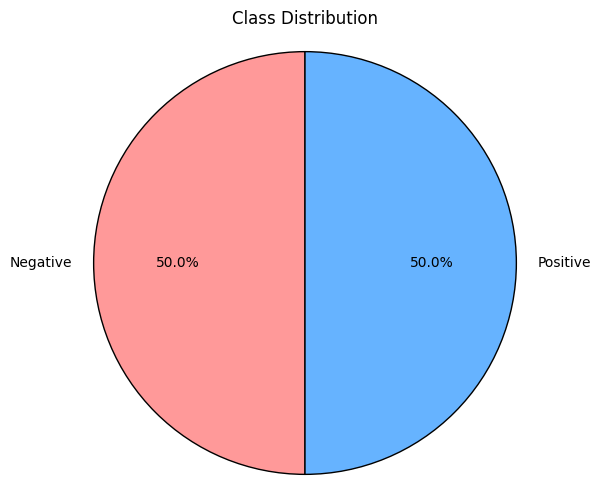

In [ ]:
# Hitung jumlah masing-masing kelas
sentiment_counts = df_dirt['sentiment'].value_counts().sort_index()
labels = ['Negative', 'Positive']
colors = ['#ff9999','#66b3ff']  # Warna bisa disesuaikan

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Class Distribution')
plt.axis('equal')  # Supaya bentuk pie-nya bulat
plt.show()


Dataset terdiri dari lima puluh ribu review yang seimbang: lima puluh persen positif dan lima puluh persen negatif, bagus untuk eksperimen karena tidak bias kelas.

## Distribusi Panjang Review

Statistik Panjang Review (jumlah kata):
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


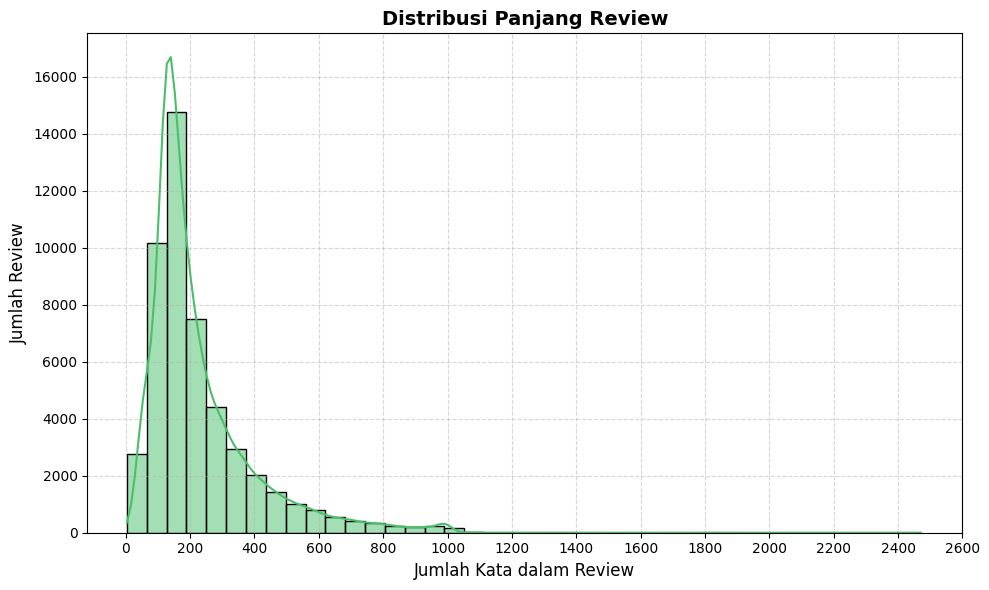

In [ ]:
# Hitung panjang review
df_dirt['review_length'] = df_dirt['review'].apply(lambda x: len(str(x).split()))

# Statistik
print("Statistik Panjang Review (jumlah kata):")
print(df_dirt['review_length'].describe())

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df_dirt['review_length'], bins=40, kde=True, color="#4BBE6A", edgecolor='black')
plt.title("Distribusi Panjang Review", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Kata dalam Review", fontsize=12)
plt.ylabel("Jumlah Review", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Buat xticks per 200
max_len = df_dirt['review_length'].max()
plt.xticks(np.arange(0, max_len + 200, 200))

plt.tight_layout()
plt.show()



kebanyakan review Panjang katanya sekitar 150 - 200 kata


## Word Cloud Pada Setiap Sentimen (kelas)



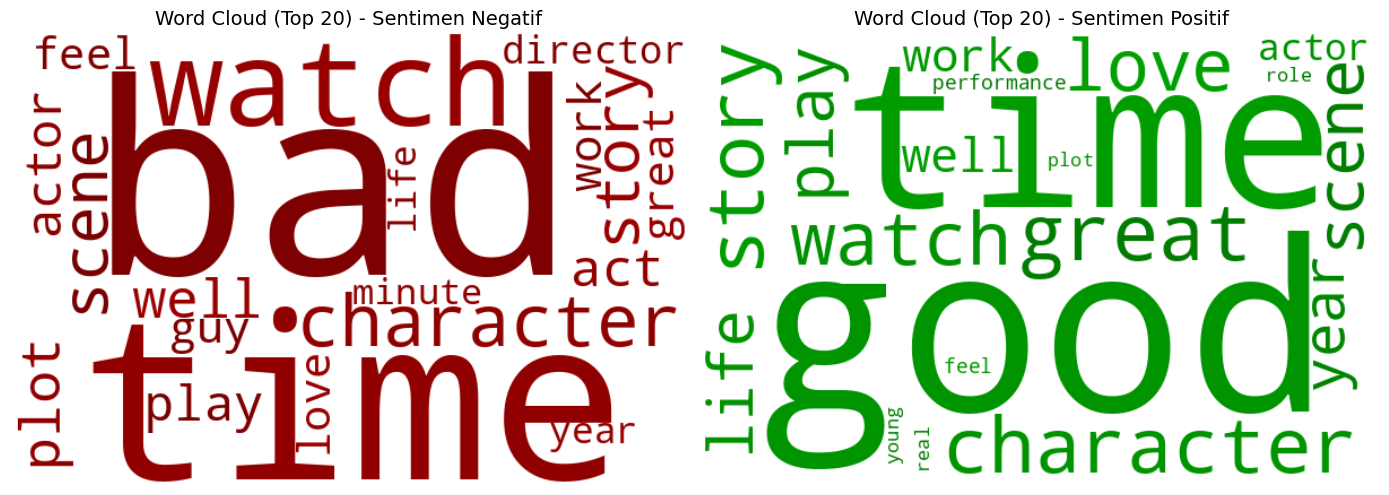

In [ ]:
# Stopwords manual
stopwords_manual = [
    "'s", 'movie', 'film', 'movies', 'films', 'many', 'didst',
    '-', 'not', 'be', "'", 'thing', 'm'
]

# Fungsi bantu untuk ambil top 20 kata tanpa stopword
def get_top_20_freq(text, stopwords, exclude=[]):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords and word not in exclude]
    word_counts = Counter(filtered_words)
    return dict(word_counts.most_common(20))

# Fungsi warna gelap agar tidak pudar
def dark_color_func_neg(*args, **kwargs):
    return "rgb({}, {}, {})".format(random.randint(120, 160), 0, 0)  # Merah gelap

def dark_color_func_pos(*args, **kwargs):
    return "rgb({}, {}, {})".format(0, random.randint(120, 160), 0)  # Hijau gelap

# Ambil teks dari masing-masing sentimen
text_negatif = ' '.join(df[df['sentiment'] == 0]['cleaned_review'].astype(str))
text_positif = ' '.join(df[df['sentiment'] == 1]['cleaned_review'].astype(str))

# Hapus "good" hanya dari sentimen negatif
freq_negatif = get_top_20_freq(text_negatif, stopwords_manual, exclude=['good'])
freq_positif = get_top_20_freq(text_positif, stopwords_manual)

# Buat WordCloud dari frekuensi
wc_negatif = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(freq_negatif)
wc_positif = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(freq_positif)

# Tampilkan berdampingan
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_negatif.recolor(color_func=dark_color_func_neg), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Top 20) - Sentimen Negatif', fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(wc_positif.recolor(color_func=dark_color_func_pos), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Top 20) - Sentimen Positif', fontsize=14)

plt.tight_layout()
plt.show()


Kata-kata emosional dan ekspresif seperti bad, watch, dan time sering mendominasi review dengan sentimen negatif, mencerminkan kekecewaan atau pengalaman buruk penonton terhadap film. Sebaliknya, pada review positif, kata-kata deskriptif atau pujian seperti good, great, dan love lebih banyak muncul, menunjukkan apresiasi atau kepuasan. Perbedaan kosakata ini membantu model membedakan sentimen karena kata-kata yang sering muncul memberikan sinyal emosional yang jelas.

# Split Data

Data dibagi menjadi tiga set: training (untuk melatih model) 80%, validation 10% (untuk memantau dan mencegah overfitting dengan early stopping), dan test 10% (untuk pengujian akhir yang objektif)

In [ ]:
# Pisahkan fitur dan label
reviews = df['cleaned_review'].values
labels = df['sentiment'].values

# Pertama: pisahkan 80% train dan 20% (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Kedua: pisahkan 20% tadi menjadi 10% val dan 10% test → test_size=0.5
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Cek jumlah data
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data validasi: {len(X_val)}")
print(f"Jumlah data tes: {len(X_test)}")


Jumlah data training: 39665
Jumlah data validasi: 4958
Jumlah data tes: 4959


Teks ulasan diubah menjadi urutan angka (sequences) dan panjangnya disamakan (padding) agar dapat diproses oleh model. Proses `.fit_on_texts()` pada kode berikut ini yang hanya dilakukan pada data training merupakan langkah untuk menghindari kebocoran data.

In [ ]:
# Inisialisasi tokenizer
MAX_VOCAB = 10000
MAXLEN = 200
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")

# Fit HANYA pada data training
tokenizer.fit_on_texts(X_train)

# Ubah semua set data menjadi sekuens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Lakukan padding pada semua set data
X_train_pad = pad_sequences(X_train_seq, maxlen=MAXLEN, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAXLEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAXLEN, padding='post', truncating='post')

# Definisi Model

Kami menggunakan dua model *recurrent* dengan **arsitektur unidirectional** (satu arah): RNN standar dan LSTM. Berbeda dengan model *bidirectional*, model ini hanya memproses informasi dari awal hingga akhir sekuens tanpa memanfaatkan konteks kata-kata yang akan datang. Tujuannya adalah untuk membandingkan secara langsung kemampuan kedua arsitektur dalam menangani data sekuensial dengan keterbatasan ini.

Kedua model menggunakan *embedding layer* untuk mengubah indeks kata menjadi vektor berdimensi 100, diikuti oleh lapisan *recurrent* (RNN atau LSTM) untuk memproses urutan kata, serta *fully connected layer* untuk menghasilkan prediksi sentimen.

Pada RNN, urutan vektor diproses secara satu arah melalui dua *hidden layer* berukuran 256 neuron. *Hidden state* terakhir diambil sebagai representasi review. Dropout sebesar 0,5 digunakan untuk mencegah *overfitting*. Representasi ini kemudian diteruskan ke *linear layer* dan fungsi sigmoid untuk menghasilkan probabilitas sentimen antara 0 dan 1.

Sementara itu, arsitektur LSTM memiliki alur serupa, namun dengan mekanisme *cell state* dan tiga gerbang utama—input, forget, dan output gate—yang memungkinkan informasi penting bertahan lebih lama dan mengatasi masalah *vanishing gradient* yang sering terjadi pada RNN. Hal ini membuat LSTM lebih andal dalam memahami konteks review yang panjang.

## RNN

In [ ]:
class RNNModelUnidirectional(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers=2, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Mengubah bidirectional menjadi False
        self.rnn = nn.RNN(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=False,  # Diubah
            dropout=dropout,
            batch_first=True
        )

        self.dropout = nn.Dropout(dropout)

        # Ukuran input fc sekarang hanya hidden_dim (bukan hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)

        # Logika disederhanakan karena hanya ada satu arah (forward)
        # hidden[-1,:,:] mengambil hidden state terakhir dari layer terakhir
        hidden = self.dropout(hidden[-1,:,:])

        out = self.fc(hidden)
        return self.sigmoid(out)

In [ ]:
# Pindahkan ke device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ganti ini:
# model_rnn_bidirectional = RNNModel(...)

# Menjadi ini:
model_rnn_uni = RNNModelUnidirectional(
    vocab_size=10000,
    embedding_dim=100,
    hidden_dim=256,
    output_dim=1,
    n_layers=2,
    dropout=0.5
).to(device)

optimizer_rnn = optim.Adam(model_rnn_uni.parameters(), lr=1e-4, weight_decay=1e-5)

criterion_rnn = nn.BCELoss().to(device)


## LSTM

In [ ]:
class LSTMModelUnidirectional(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers=2, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Mengubah bidirectional menjadi False
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=False,  # Diubah
            dropout=dropout,
            batch_first=True
        )

        self.dropout = nn.Dropout(dropout)

        # Ukuran input fc sekarang hanya hidden_dim
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.sigmoid = nn.Sigmoid()

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)

        # Logika disederhanakan untuk satu arah
        hidden = self.dropout(hidden[-1,:,:])

        return self.sigmoid(self.fc(hidden))

In [ ]:
# Inisialisasi model, optimizer, dan loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_lstm_uni = LSTMModelUnidirectional(
    vocab_size=10000,
    embedding_dim=100,
    hidden_dim=256,
    output_dim=1,
    n_layers=2,
    dropout=0.5
).to(device)

optimizer_lstm = optim.Adam(model_lstm_uni.parameters(), lr=1e-4, weight_decay=1e-5)
criterion_lstm = nn.BCELoss().to(device)

# Data Loader

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Konversi ke numpy array jika belum
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Buat tensor
X_train_tensor = torch.LongTensor(X_train_pad)
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.LongTensor(X_val_pad)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.LongTensor(X_test_pad)
y_test_tensor = torch.FloatTensor(y_test)

# Buat dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Buat DataLoader
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

print("DataLoader untuk train, validasi, dan tes sudah siap.")

DataLoader untuk train, validasi, dan tes sudah siap.


# Train dan Validasi

In [ ]:
def train_epoch_with_grads(model, iterator, optimizer, criterion, device):
    """Fungsi train yang dimodifikasi untuk mengumpulkan gradien per-batch."""
    model.train()
    epoch_loss, correct, total = 0, 0, 0
    batch_grad_norms = {name: [] for name, p in model.named_parameters() if p.requires_grad}

    for X_batch, y_batch in iterator:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_batch = y_batch.unsqueeze(1)

        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.float())
        loss.backward()

        for name, p in model.named_parameters():
            if p.grad is not None and p.requires_grad:
                grad_norm = p.grad.detach().norm(2).item()
                batch_grad_norms[name].append(grad_norm)

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()

        epoch_loss += loss.item()
        preds = (predictions >= 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    return epoch_loss / len(iterator), correct / total, batch_grad_norms

In [ ]:
def evaluate_epoch(model, iterator, criterion, device):
    """Fungsi evaluasi standar."""
    model.eval()
    epoch_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in iterator:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_batch = y_batch.unsqueeze(1)
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch.float())
            epoch_loss += loss.item()
            preds = (predictions >= 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    return epoch_loss / len(iterator), correct / total

In [ ]:
def run_training_loop(model, train_iterator, valid_iterator, optimizer, criterion, device,
                      model_name="Model", model_save_path="best_model.pt", n_epochs=100, patience=10):

    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    # History terpisah untuk gradien per layer per batch
    full_grad_history = {name: [] for name, p in model.named_parameters() if p.requires_grad}

    patience_counter = 0
    best_val_loss = float('inf')

    print(f"🚀 Memulai training untuk {model_name}...")
    print("=" * 50)

    for epoch in range(n_epochs):
        # Fungsi train sekarang mengembalikan gradien per batch
        train_loss, train_acc, batch_grads = train_epoch_with_grads(
            model, train_iterator, optimizer, criterion, device
        )

        # Gabungkan history gradien dari epoch ini ke history utama
        for name, grads in batch_grads.items():
            full_grad_history[name].extend(grads)

        val_loss, val_acc = evaluate_epoch(model, valid_iterator, criterion, device)

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # (Sisa kode untuk print dan early stopping tetap sama...)
        print(f"Epoch {epoch+1:02}/{n_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%")
        print(f"Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)
            patience_counter = 0
            print(f"✔️ Validation loss membaik, model disimpan.")
        else:
            patience_counter += 1
            print(f"⚠️ Tidak ada peningkatan. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"🛑 Early stopping! Berhenti pada epoch {epoch+1}.")
            break
        print("-" * 50)

    print(f"\n✅ Training untuk {model_name} selesai.")
    return history, full_grad_history

## RNN

In [ ]:
# Inisialisasi model dan optimizer RNN
model_rnn_uni = RNNModelUnidirectional(
    vocab_size=10000, embedding_dim=100, hidden_dim=256,
    output_dim=1, n_layers=2, dropout=0.5
).to(device)



# Jalankan training untuk RNN dan simpan hasilnya ke DUA variabel
rnn_epoch_history, rnn_grad_history = run_training_loop(
    model=model_rnn_uni,
    train_iterator=train_loader,
    valid_iterator=val_loader,
    optimizer=optimizer_rnn,
    criterion=criterion_rnn,
    device=device,
    model_name="RNN Unidirectional",
    model_save_path="best_model_rnn_uni.pt"
)

🚀 Memulai training untuk RNN Unidirectional...
Epoch 01/100 | Train Loss: 0.6984 | Train Acc: 50.23%
Val. Loss: 0.6937 | Val. Acc: 50.56%
✔️ Validation loss membaik, model disimpan.
--------------------------------------------------
Epoch 02/100 | Train Loss: 0.6987 | Train Acc: 50.18%
Val. Loss: 0.6937 | Val. Acc: 50.56%
⚠️ Tidak ada peningkatan. Patience: 1/10
--------------------------------------------------
Epoch 03/100 | Train Loss: 0.6995 | Train Acc: 49.96%
Val. Loss: 0.6937 | Val. Acc: 50.56%
⚠️ Tidak ada peningkatan. Patience: 2/10
--------------------------------------------------
Epoch 04/100 | Train Loss: 0.6988 | Train Acc: 49.82%
Val. Loss: 0.6937 | Val. Acc: 50.56%
⚠️ Tidak ada peningkatan. Patience: 3/10
--------------------------------------------------
Epoch 05/100 | Train Loss: 0.7000 | Train Acc: 49.90%
Val. Loss: 0.6937 | Val. Acc: 50.56%
⚠️ Tidak ada peningkatan. Patience: 4/10
--------------------------------------------------
Epoch 06/100 | Train Loss: 0.6990 |

## LSTM

In [ ]:
# Inisialisasi model dan optimizer LSTM
model_lstm_uni = LSTMModelUnidirectional(
    vocab_size=10000, embedding_dim=100, hidden_dim=256,
    output_dim=1, n_layers=2, dropout=0.5
).to(device)

optimizer_lstm = optim.Adam(model_lstm_uni.parameters(), lr=1e-4, weight_decay=1e-5)

# Jalankan training untuk LSTM dan simpan hasilnya ke DUA variabel
lstm_epoch_history, lstm_grad_history = run_training_loop(
    model=model_lstm_uni,
    train_iterator=train_loader,
    valid_iterator=val_loader,
    optimizer=optimizer_lstm,
    criterion=criterion_lstm,
    device=device,
    model_name="LSTM Unidirectional",
    model_save_path="best_model_lstm_uni.pt"
)

🚀 Memulai training untuk LSTM Unidirectional...
Epoch 01/100 | Train Loss: 0.6934 | Train Acc: 50.46%
Val. Loss: 0.6952 | Val. Acc: 49.62%
✔️ Validation loss membaik, model disimpan.
--------------------------------------------------
Epoch 02/100 | Train Loss: 0.6931 | Train Acc: 50.17%
Val. Loss: 0.6923 | Val. Acc: 51.43%
✔️ Validation loss membaik, model disimpan.
--------------------------------------------------
Epoch 03/100 | Train Loss: 0.6924 | Train Acc: 50.49%
Val. Loss: 0.6920 | Val. Acc: 51.47%
✔️ Validation loss membaik, model disimpan.
--------------------------------------------------
Epoch 04/100 | Train Loss: 0.6918 | Train Acc: 51.01%
Val. Loss: 0.6926 | Val. Acc: 51.49%
⚠️ Tidak ada peningkatan. Patience: 1/10
--------------------------------------------------
Epoch 05/100 | Train Loss: 0.6932 | Train Acc: 50.14%
Val. Loss: 0.6925 | Val. Acc: 51.45%
⚠️ Tidak ada peningkatan. Patience: 2/10
--------------------------------------------------
Epoch 06/100 | Train Loss: 0

# Evaluasi

## Grafik akurasi dan loss

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_comparisons_final_log(rnn_epoch_hist, lstm_epoch_hist, rnn_grad_hist, lstm_grad_hist):
    """
    Fungsi final yang sudah diperbaiki untuk membuat plot perbandingan lengkap.
    Termasuk Training & Validation Loss/Accuracy.
    """
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    plt.style.use('seaborn-v0_8-whitegrid')

    ax1, ax2 = axes[0, 0], axes[0, 1]
    ax3, ax4 = axes[1, 0], axes[1, 1]

    # =============== Plot 1: Perbandingan Training & Validation Loss ===============
    # TAMBAHAN: Garis untuk Training Loss (garis putus-putus)
    ax1.plot(rnn_epoch_hist['train_loss'], label='RNN Train Loss', color='royalblue', linestyle='--')
    ax1.plot(lstm_epoch_hist['train_loss'], label='LSTM Train Loss', color='darkorange', linestyle='--')

    # Garis untuk Validation Loss (garis penuh dengan marker)
    ax1.plot(rnn_epoch_hist['val_loss'], label='RNN Validation Loss', color='deepskyblue', linestyle='-', marker='o', markersize=5)
    ax1.plot(lstm_epoch_hist['val_loss'], label='LSTM Validation Loss', color='sandybrown', linestyle='-', marker='o', markersize=5)

    ax1.set_title('Perbandingan Training & Validation Loss', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(loc='upper right', fontsize=12)
    ax1.grid(True, which='both', linestyle='--')

    # =============== Plot 2: Perbandingan Training & Validation Accuracy ===============
    # TAMBAHAN: Garis untuk Training Accuracy (garis putus-putus)
    ax2.plot(rnn_epoch_hist['train_acc'], label='RNN Train Accuracy', color='royalblue', linestyle='--')
    ax2.plot(lstm_epoch_hist['train_acc'], label='LSTM Train Accuracy', color='darkorange', linestyle='--')

    # Garis untuk Validation Accuracy (garis penuh dengan marker)
    ax2.plot(rnn_epoch_hist['val_acc'], label='RNN Validation Accuracy', color='deepskyblue', linestyle='-', marker='o', markersize=5)
    ax2.plot(lstm_epoch_hist['val_acc'], label='LSTM Validation Accuracy', color='sandybrown', linestyle='-', marker='o', markersize=5)

    ax2.set_title('Perbandingan Training & Validation Accuracy', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.legend(loc='lower right', fontsize=12)
    ax2.grid(True, which='both', linestyle='--')

    # =============== Plot 3: Gradient Norm per Layer (RNN) ===============
    for name, grads in rnn_grad_hist.items():
        if 'weight' in name:
            window_size = 50
            if len(grads) > window_size:
                smoothed_grads = np.convolve(grads, np.ones(window_size)/window_size, mode='valid')
                ax3.plot(smoothed_grads, label=name)
    ax3.set_title('Gradient Magnitude per Batch (RNN)', fontsize=16)
    ax3.set_xlabel('Batch (Iterasi)', fontsize=12)
    ax3.set_ylabel('Gradient Norm (Log Scale)', fontsize=12)
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    ax3.grid(True)
    ax3.set_yscale('log')

    # =============== Plot 4: Gradient Norm per Layer (LSTM) ===============
    for name, grads in lstm_grad_hist.items():
        if 'weight' in name:
            window_size = 50
            if len(grads) > window_size:
                smoothed_grads = np.convolve(grads, np.ones(window_size)/window_size, mode='valid')
                ax4.plot(smoothed_grads, label=name)
    ax4.set_title('Gradient Magnitude per Batch (LSTM)', fontsize=16)
    ax4.set_xlabel('Batch (Iterasi)', fontsize=12)
    ax4.set_ylabel('Gradient Norm (Log Scale)', fontsize=12)
    ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    ax4.grid(True)
    ax4.set_yscale('log')

    plt.tight_layout(pad=3.0)
    plt.show()


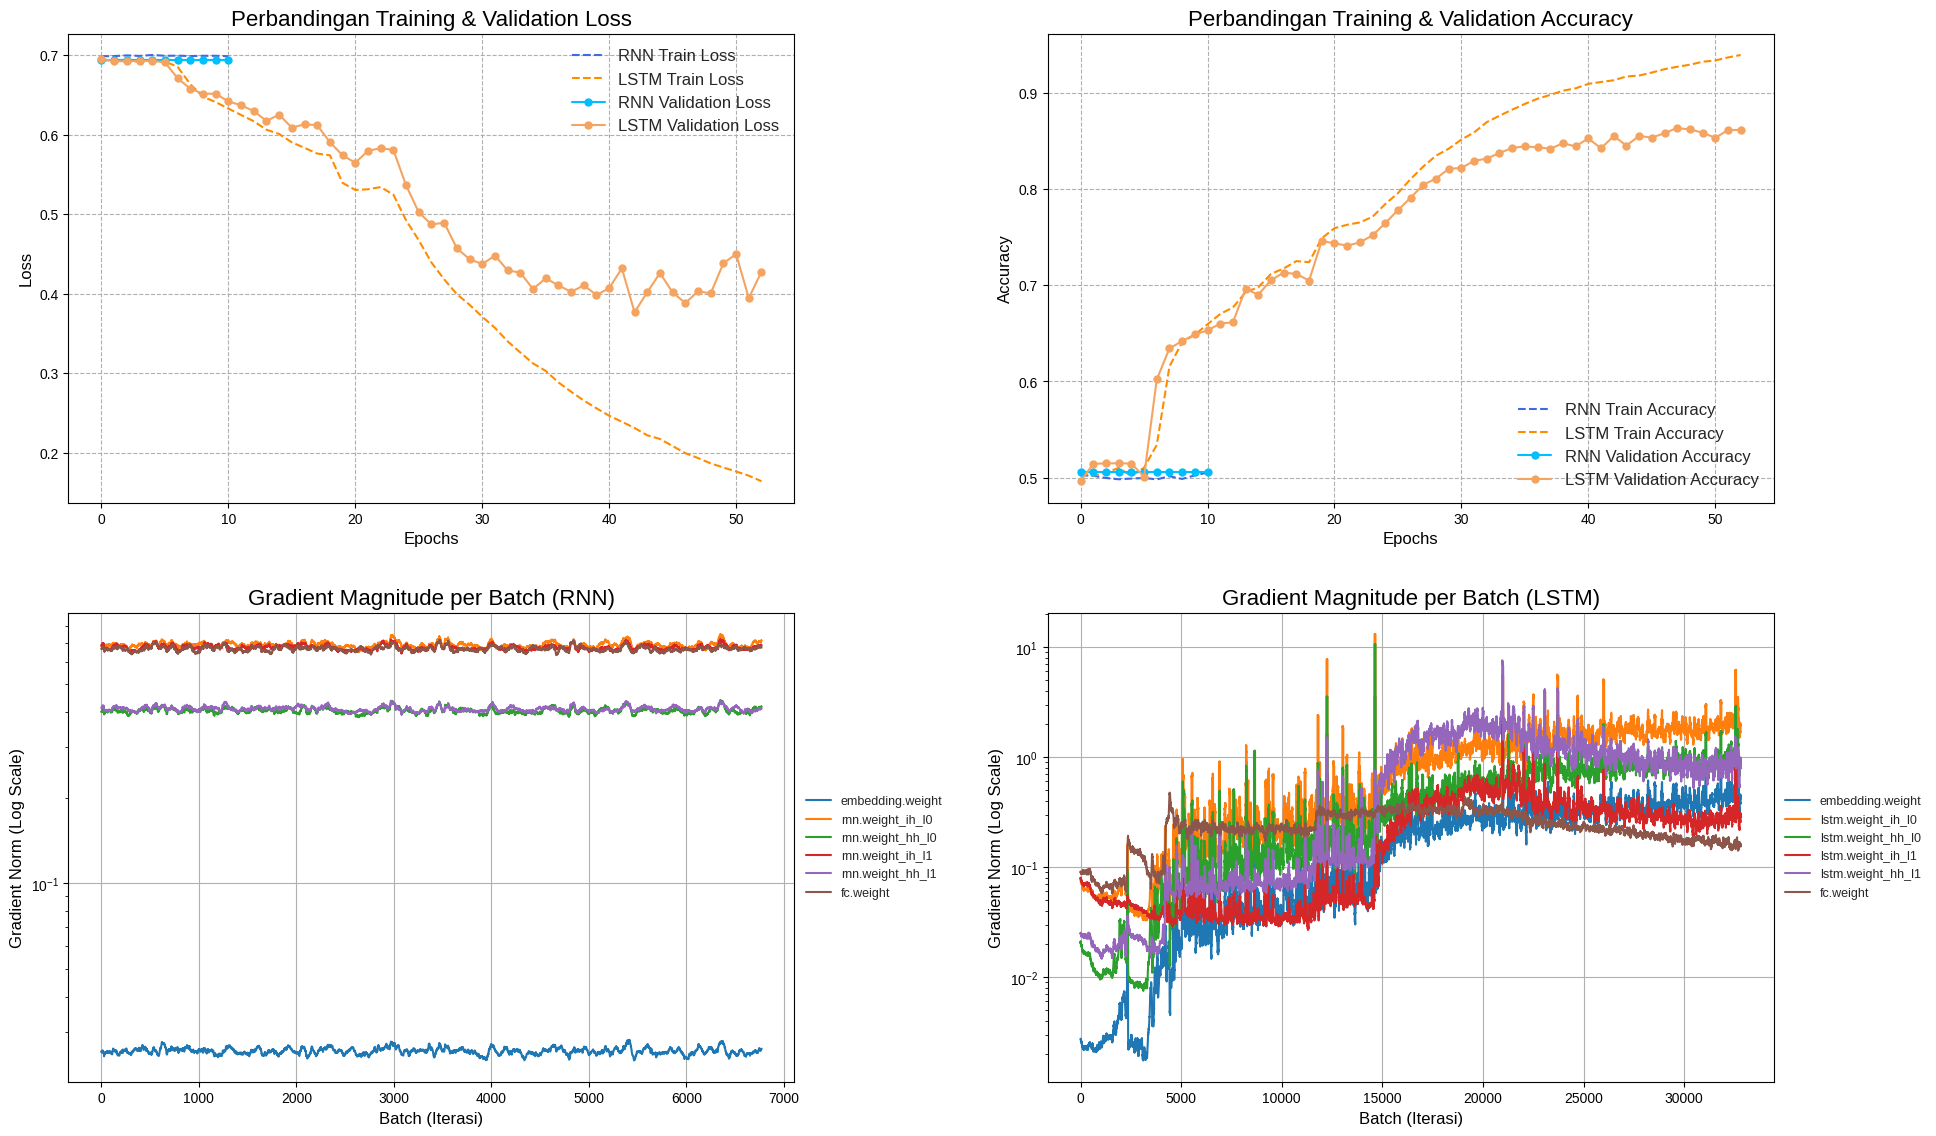

In [ ]:
# Panggil fungsi dengan semua history yang sudah didapat
plot_all_comparisons_final_log(
    rnn_epoch_history,
    lstm_epoch_history,
    rnn_grad_history,
    lstm_grad_history
)

**INTERPRETASI:**

- **Grafik Perbadingan Train & Validation Loss**

  >Grafik perbandingan menunjukkan bahwa model **LSTM mengungguli RNN**. Hal ini terlihat dari **validation loss LSTM yang lebih rendah** serta **akurasi validasi yang lebih tinggi** dibandingkan RNN.

  >RNN berhenti jauh lebih awal karena performanya cepat stagnan. Ini mencerminkan masalah **vanishing gradient**, di mana arsitektur RNN standar kesulitan mempelajari pola dari data sekuensial yang panjang. Karena tidak menunjukkan perkembangan, *early stopping* secara otomatis menghentikan pelatihan. Meski begitu, RNN tidak mengalami overfitting karena proses training terhenti sebelum sempat belajar berlebihan.

  >Sebaliknya, LSTM mampu terus belajar hingga epoch yang lebih tinggi. Meskipun mulai terlihat adanya **tanda-tanda overfitting** (ditunjukkan oleh jarak yang mulai terbentuk antara kurva training dan validation loss) namun hal ini berhasil dikendalikan oleh *early stopping*. Hasil akhirnya, LSTM menunjukkan performa yang lebih stabil dan akurat dibanding RNN.

- **Grafik Perbadingan Train & Validation Accuracy**

  >Grafik akurasi menunjukkan bahwa model **LSTM (oranye)** memiliki performa yang jauh lebih baik dibandingkan **RNN (biru)**. LSTM mampu mencapai akurasi yang tinggi secara konsisten, baik pada data training maupun validation. Meskipun mulai muncul celah antara keduanya (tanda awal overfitting) hal ini berhasil dikendalikan oleh **early stopping**, yang menghentikan pelatihan tepat waktu sebelum model belajar berlebihan. Secara keseluruhan, proses belajar pada LSTM berlangsung stabil dan efektif.

  >Sebaliknya, model RNN mengalami **stagnasi akurasi sejak awal pelatihan**, dengan kurva yang mendatar di kisaran 50%. Hal ini merupakan indikasi kuat dari **vanishing gradient**, di mana gradien yang sangat kecil membuat pembaruan bobot tidak efektif, sehingga model gagal belajar dari data sekuensial. Akibatnya, **early stopping** menghentikan pelatihan lebih awal karena tidak ada peningkatan signifikan pada performa validasi. Walaupun RNN tidak overfit, model ini juga tidak cukup belajar, sehingga performanya jauh tertinggal dari LSTM.

- **Interpretasi Gradien per Layer (RNN)**

  * **`embedding.weight`**:
    Gradien sangat kecil (sekitar 10⁻² hingga 10⁻¹) dan hampir datar sepanjang pelatihan. Ini menandakan terjadinya *vanishing gradient* yang cukup parah. Sinyal error dari output gagal mencapai layer ini secara efektif, menyebabkan pembelajaran pada representasi input sangat minim.

  * **`rnn.weight_ih_lX` dan `rnn.weight_hh_lX`**:
    Gradien berada di bawah 1 namun **lebih rendah dibandingkan lapisan output**, dan cenderung **stabil namun stagnan**. Pola ini menunjukkan bahwa meskipun sinyal error masih mencapai lapisan RNN, proses pembaruan bobot tidak terlalu signifikan. Dengan kata lain, pembelajaran pada RNN terjadi, tapi sangat terbatas dan kurang dinamis (kemungkinan disebabkan oleh akumulasi efek vanishing gradient dari layer sebelumnya).

  * **`fc.weight` (fully connected)**:
    Gradien relatif tinggi (mendekati 1) dan stabil sepanjang iterasi. Karena langsung terhubung ke loss, layer ini menerima sinyal error penuh dan tetap aktif belajar. Ini adalah satu-satunya layer yang benar-benar menunjukkan aktivitas pembaruan parameter yang signifikan.

  **Kesimpulan**:

  Model ini menunjukkan gejala *vanishing gradient* yang cukup ekstrem, khususnya pada lapisan awal (`embedding.weight`) yang hampir tidak mengalami pembaruan parameter. Lapisan tengah (RNN) meskipun memiliki gradien yang tidak terlalu kecil, menunjukkan tren stagnan yang menandakan pembelajaran kurang aktif. Hanya lapisan akhir (`fc.weight`) yang secara konsisten menerima sinyal error dan memperbarui bobotnya secara efektif.

  Kondisi ini berbahaya karena membuat representasi awal (embedding) dan proses pemrosesan urutan (RNN) tidak belajar optimal. Akibatnya, meskipun output model bisa tetap membaik sedikit demi sedikit karena FC aktif belajar, representasi fitur dari input tidak berkembang—dan ini akan membatasi kemampuan generalisasi dan akurasi model jangka panjang.


- **Interpretasi Gradien per Layer (LSTM)**

  * **`embedding.weight`**:
    Gradien sangat kecil di awal (sekitar 10⁻²), indikasi *vanishing gradient*. Namun, seiring pelatihan, nilainya meningkat dan stabil di kisaran 10⁻¹. Ini menunjukkan bahwa sinyal error akhirnya berhasil menjangkau layer embedding setelah beberapa iterasi, dan pembelajaran pun mulai berjalan.

  * **`lstm.weight_ih_l0` dan `lstm.weight_hh_l0`** (LSTM Layer 1):
    Di awal training, gradien cukup besar dan fluktuatif (hingga >10¹), yang sempat menunjukkan gejala *exploding gradient*. Namun, setelah beberapa batch, nilainya menurun dan stabil di sekitar 10⁰, menandakan pembelajaran aktif dengan distribusi gradien yang terkendali.

  * **`lstm.weight_ih_l1` dan `lstm.weight_hh_l1`** (LSTM Layer 2):
    Gradien awalnya cukup rendah (<10⁻¹), lalu perlahan meningkat hingga mendekati 10⁰. Pola ini menunjukkan bahwa layer kedua mulai menerima sinyal pembaruan secara bertahap dari layer sebelumnya (menandakan penyaluran informasi dan gradien yang semakin efektif).

  * **`fc.weight`** (Fully Connected):
    Gradien relatif stabil sepanjang pelatihan (10⁻¹ hingga 10⁰). Karena terhubung langsung ke loss, lapisan ini menerima sinyal kesalahan penuh dan melakukan pembaruan bobot secara konsisten.

  **Kesimpulan:**

  Model LSTM memperlihatkan *penyaluran gradien yang semakin stabil seiring waktu*. Meskipun terdapat *vanishing gradient* ringan di awal pelatihan (khususnya di `embedding.weight`), mekanisme *gating* khas LSTM secara bertahap memungkinkan sinyal error mencapai seluruh layer. Tidak ada layer yang sepenuhnya stagnan, dan pada akhirnya semua lapisan berkontribusi aktif dalam pembelajaran.

  Hal ini menunjukkan bahwa arsitektur LSTM mampu mengatasi masalah gradien yang biasa terjadi pada RNN klasik, dan tetap efektif untuk menangani *long-term dependencies*, karena aliran informasi tidak terputus antar waktu maupun antar layer.



### Training Log: RNN vs LSTM

| **Kategori**        | **RNN**                                                                 | **LSTM**                                                                                     |
|---------------------|-------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Train Accuracy**  | Meningkat lambat dan stagnan di kisaran 50%, tidak menunjukkan perkembangan berarti. | Meningkat pesat dari awal hingga mencapai **95.24%** pada epoch ke-65 sebelum *early stopping*.  |
| **Val Accuracy**    | Tetap stagnan di **50.83%** selama 11 epoch.                            | Meningkat stabil dari **49.62%** hingga **86.47%**, mulai terlihat overfitting setelah epoch ke-52.  |
| **Train Loss**      | Stabil di kisaran **0.706**, tidak membaik signifikan selama training.   | Menurun konsisten dari **0.693** ke **0.1468** hingga *early stopping* di epoch ke-66.       |
| **Val Loss**        | Tetap stagnan di **0.7000**, tidak mengalami penurunan.                 | Menurun signifikan hingga **0.3683** (epoch 56), kemudian mulai naik kembali (*overfitting ringan*). |







## Test

In [ ]:
def test_model_and_display_results(model, model_save_path, test_iterator, criterion, device, model_name=""):
    """
    Fungsi lengkap untuk memuat model, mengevaluasi, menampilkan hasil,
    DAN MENGEMBALIKAN PREDIKSI untuk analisis lebih lanjut.
    """
    model.load_state_dict(torch.load(model_save_path, map_location=device))
    model.eval()

    epoch_loss, correct, total = 0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for X_batch, y_batch in test_iterator:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            predictions = model(X_batch).squeeze()
            loss = criterion(predictions, y_batch.float())
            epoch_loss += loss.item()
            preds = (predictions >= 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    test_acc = correct / total
    test_loss = epoch_loss / len(test_iterator)

    print(f"\n{'='*20} HASIL EVALUASI FINAL: {model_name} {'='*20}")
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%\n')
    print('📊 Laporan Klasifikasi:')
    print(classification_report(all_labels, all_preds, target_names=['Negative', 'Positive']))
    print('\n🔢 Confusion Matrix:')
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'], annot_kws={"size": 14})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix ({model_name})', fontsize=16)
    plt.show()
    print("=" * (60 + len(model_name)))

    # PERUBAHAN: Tambahkan baris ini untuk mengembalikan hasil
    return all_preds, all_labels

### RNN

In [ ]:
!wget https://github.com/mabdulghofur142/NLP-IMDB/raw/main/best_model_rnn_uni%20%281%29.pt -O best_model_rnn_uni.pt


--2025-07-23 13:29:49--  https://github.com/mabdulghofur142/NLP-IMDB/raw/main/best_model_rnn_uni%20%281%29.pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mabdulghofur142/NLP-IMDB/main/best_model_rnn_uni%20(1).pt [following]
--2025-07-23 13:29:50--  https://raw.githubusercontent.com/mabdulghofur142/NLP-IMDB/main/best_model_rnn_uni%20(1).pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4896808 (4.7M) [application/octet-stream]
Saving to: ‘best_model_rnn_uni.pt’

best_model_rnn_uni. 100%[===================>]   4.67M  --.-KB/s    in 0.06s   

2025-07-23 13:29:51 (81.7 MB/s) - ‘best_model_rnn_

In [ ]:
model_rnn_uni = RNNModelUnidirectional(
    vocab_size=10000,
    embedding_dim=100,
    hidden_dim=256,
    output_dim=1,
    n_layers=2,
    dropout=0.5
).to(device)



==================== HASIL EVALUASI FINAL: RNN Unidirectional ====================
Test Loss: 0.695 | Test Acc: 50.05%

📊 Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.50      0.94      0.65      2441
    Positive       0.57      0.07      0.13      2518

    accuracy                           0.50      4959
   macro avg       0.53      0.51      0.39      4959
weighted avg       0.53      0.50      0.38      4959


🔢 Confusion Matrix:


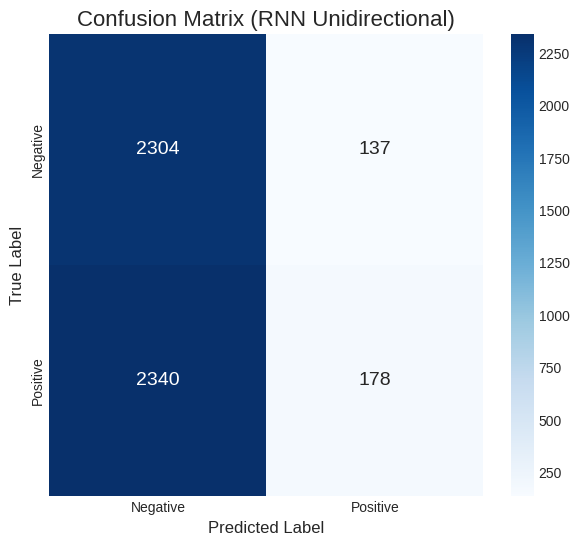

In [ ]:
test_preds_rnn, test_labels_rnn = test_model_and_display_results(
    model=model_rnn_uni,
    model_save_path="best_model_rnn_uni.pt",
    test_iterator=test_loader,
    criterion=criterion_rnn,
    device=device,
    model_name="RNN Unidirectional"
)

### LSTM

In [ ]:
!wget "https://github.com/mabdulghofur142/NLP-IMDB/raw/refs/heads/main/best_model_lstm_uni%20(1).pt" -O best_model_lstm_uni.pt


--2025-07-23 13:29:52--  https://github.com/mabdulghofur142/NLP-IMDB/raw/refs/heads/main/best_model_lstm_uni%20(1).pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mabdulghofur142/NLP-IMDB/refs/heads/main/best_model_lstm_uni%20(1).pt [following]
--2025-07-23 13:29:53--  https://raw.githubusercontent.com/mabdulghofur142/NLP-IMDB/refs/heads/main/best_model_lstm_uni%20(1).pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7575664 (7.2M) [application/octet-stream]
Saving to: ‘best_model_lstm_uni.pt’

best_model_lstm_uni 100%[===================>]   7.22M  --.-KB/s    in 0.05s   

2025-07-23 13:29:

In [ ]:
model_lstm_uni = LSTMModelUnidirectional(
    vocab_size=10000,
    embedding_dim=100,
    hidden_dim=256,
    output_dim=1,
    n_layers=2,
    dropout=0.5
).to(device)



==================== HASIL EVALUASI FINAL: LSTM Unidirectional ====================
Test Loss: 0.398 | Test Acc: 84.78%

📊 Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.87      0.81      0.84      2441
    Positive       0.83      0.88      0.85      2518

    accuracy                           0.85      4959
   macro avg       0.85      0.85      0.85      4959
weighted avg       0.85      0.85      0.85      4959


🔢 Confusion Matrix:


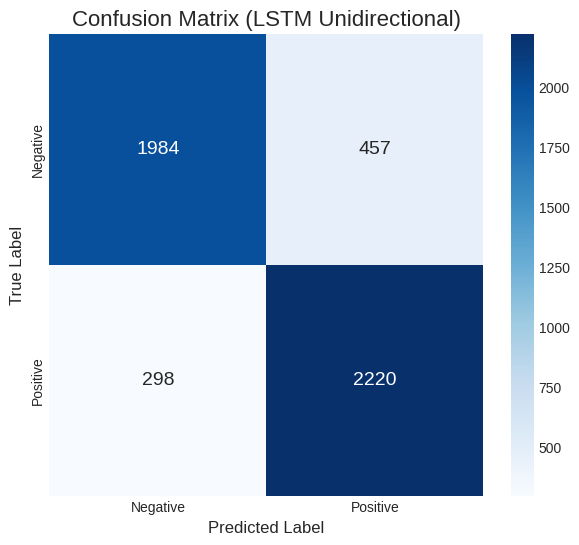

In [ ]:
test_preds_lstm, test_labels_lstm = test_model_and_display_results(
    model=model_lstm_uni,
    model_save_path="best_model_lstm_uni.pt",
    test_iterator=test_loader,
    criterion=criterion_lstm,
    device=device,
    model_name="LSTM Unidirectional"
)

# Analisis Kesalahan Model

In [ ]:
def analyze_model_errors(predictions, true_labels, original_texts, model_name="", max_samples=3):
    """
    Menganalisis dan menampilkan sampel ulasan yang salah diklasifikasikan oleh model.
    """
    label_map = {0: "Negative", 1: "Positive"}

    df_errors = pd.DataFrame({
        'text': original_texts,
        'true_label': true_labels,
        'predicted_label': predictions
    })

    misclassified = df_errors[df_errors['true_label'] != df_errors['predicted_label']]

    print(f"\n{'='*25} ANALISIS KESALAHAN: {model_name} {'='*25}")
    print(f"Total kesalahan: {len(misclassified)} dari {len(df_errors)} sampel data tes.")

    if len(misclassified) == 0:
        print("Tidak ada kesalahan yang ditemukan.")
        return

    print(f"Menampilkan hingga {max_samples} contoh kesalahan:\n")

    for index, row in misclassified.head(max_samples).iterrows():
        print(f"--- Sampel Kesalahan #{index+1} ---")
        print(f"Teks Ulasan: \n{row['text']}")
        print("-" * 20)
        print(f"Label Asli     : {label_map[row['true_label']]}")
        print(f"Prediksi Model : {label_map[row['predicted_label']]}")
        print("\n" + "="*50 + "\n")

## RNN

In [ ]:
analyze_model_errors(
    predictions=test_preds_rnn,
    true_labels=test_labels_rnn,
    original_texts=X_test,
    model_name="RNN Unidirectional"
)


========================= ANALISIS KESALAHAN: RNN Unidirectional =========================
Total kesalahan: 2477 dari 4959 sampel data tes.
Menampilkan hingga 3 contoh kesalahan:

--- Sampel Kesalahan #1 ---
Teks Ulasan: 
ernst lubitsch 's contribution american cinema enormous legacy outstanding group movie live forever case shop corner film remade distinguished movie musical play charm elegance lubitsch 's definite version margaret sullavan james stewart work film character movie stand example movie appear act star delightful pen pal not fate working shop budapest reason classic film work amazing support cast studio picture picture wonderful frank morgan play owner shop joseph schildkraut felix bressart william tracy charles smith impressive work make budap film live forever
--------------------
Label Asli     : Positive
Prediksi Model : Negative


--- Sampel Kesalahan #6 ---
Teks Ulasan: 
surprised secret fury enjoyable good film not expectation movie film 's plot hole not guess sch

## LSTM

In [ ]:
analyze_model_errors(
    predictions=test_preds_lstm,
    true_labels=test_labels_lstm,
    original_texts=X_test,
    model_name="LSTM Unidirectional"
)


========================= ANALISIS KESALAHAN: LSTM Unidirectional =========================
Total kesalahan: 755 dari 4959 sampel data tes.
Menampilkan hingga 3 contoh kesalahan:

--- Sampel Kesalahan #5 ---
Teks Ulasan: 
feel add review website sit film feel warn parent think show child not disney film film tell ' life cruel child opinion video box describe film ' delight age imdb plot outline describe ' family film definition ' family film consist comedy adventure film base child 's literature involve number helpful animal friendly supernatural being fantasy world gear stimulate appeal imagination situation offensive material generally lesson learn apt description tarka otter thoroughly unpleasant scene totally unsuitable young child qualify film ' feel bad movie lesson learn life cruel family entertainment not hate family review reveal worth read ' external review link
--------------------
Label Asli     : Negative
Prediksi Model : Positive


--- Sampel Kesalahan #17 ---
Teks Ulasa

## Plot Miss Klasifikasi

In [ ]:
my_dict = {'review': X_test,
           'sentiment': y_test}
df2 = pd.DataFrame(my_dict)
df2['sent_pred_rnn'] = np.array(test_preds_rnn).astype(int)
df2['sent_pred_lstm'] = np.array(test_preds_lstm).astype(int)
display(df2.head())

,review,sentiment,sent_pred_rnn,sent_pred_lstm
0,ernst lubitsch 's contribution american cinema...,1,0,1
1,jason lee doggy movie fleet promise 's disting...,0,0,0
2,bad movie poor special effect poor act thing w...,0,0,0
3,offensive movie open bible imagine nbc 's movi...,0,0,0
4,feel add review website sit film feel warn par...,0,0,1


In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 400, 10000]
labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-400', '400+']



In [ ]:
# Fungsi hitung akurasi per grup
def group_accuracy(df, pred_col):
    return df.groupby('length_group').apply(lambda x: (x[pred_col] == x['sentiment']).mean())


In [ ]:
df2['review_len'] = df2['review'].apply(lambda x: len(x.split()))

# Kelompokkan panjang
df2['length_group'] = pd.cut(df2['review_len'], bins=bins, labels=labels, right=False)

acc_rnn = group_accuracy(df2, 'sent_pred_rnn')
acc_lstm = group_accuracy(df2, 'sent_pred_lstm')

acc_df = pd.DataFrame({
    'length_group': acc_rnn.index,
    'RNN Accuracy': acc_rnn.values,
    'LSTM Accuracy': acc_lstm.values
})
acc_melted = acc_df.melt(id_vars='length_group',
                         value_vars=['RNN Accuracy', 'LSTM Accuracy'],
                         var_name='Model',
                         value_name='Accuracy')

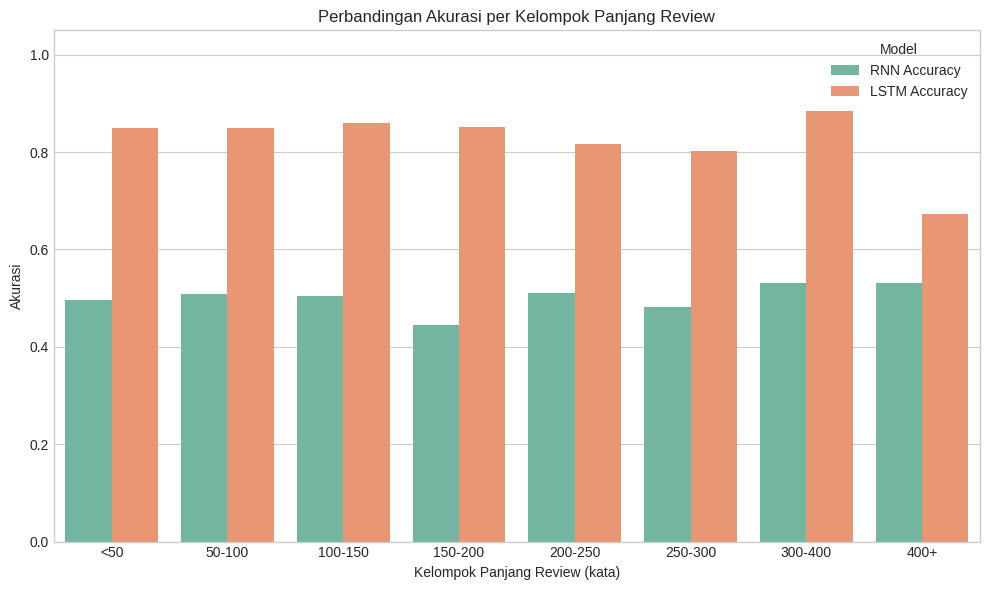

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=acc_melted, x='length_group', y='Accuracy', hue='Model', palette='Set2')
plt.title('Perbandingan Akurasi per Kelompok Panjang Review')
plt.xlabel('Kelompok Panjang Review (kata)')
plt.ylabel('Akurasi')
plt.ylim(0, 1.05)
plt.legend(title='Model')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**INTERPRETASI:**

Grafik ini memperlihatkan perbandingan akurasi antara model **RNN** dan **LSTM** pada berbagai kelompok panjang review (dihitung dalam jumlah kata). Terlihat jelas bahwa **LSTM secara konsisten memiliki akurasi lebih tinggi** dibanding RNN di semua kelompok panjang review. Pada kelompok review pendek, kurang dari 50 kata, RNN hanya mencapai akurasi sekitar 0,5 (50%), sementara LSTM mencapai lebih dari 0,85 (85%). Pola ini berulang pada kelompok berikutnya, menunjukkan **LSTM lebih mampu menangkap konteks sentimen**, baik pada review pendek maupun panjang.

RNN terlihat tidak stabil, misalnya pada review 150–200 kata, akurasinya turun mendekati 0,45. Ini menggambarkan **kelemahan RNN dalam mempertahankan informasi pada urutan kata yang panjang**, akibat masalah *vanishing gradient*. Sebaliknya, LSTM, dengan mekanisme *cell state* dan gerbang input-output, mampu menyimpan informasi penting lebih lama sehingga performanya tetap tinggi, terutama pada kelompok review panjang 300–400 kata, di mana akurasi LSTM mendekati 0,9.

Menariknya, pada review yang **sangat panjang (400+ kata)**, akurasi kedua model menurun. LSTM masih unggul sekitar 0,68, namun terjadi penurunan karena kalimat yang sangat panjang biasanya mengandung banyak informasi campuran, yang dapat membingungkan model.

Kesimpulannya, **LSTM unggul di semua panjang review** dan jauh lebih stabil dibanding RNN, yang performanya cenderung fluktuatif, terutama saat panjang teks bertambah.


# **Key Findings**

- LSTM unidirectional mengungguli RNN unidirectional dalam klasifikasi sentimen pada dataset IMDB.
- RNN menunjukkan gejala vanishing gradient, terlihat dari nilai gradien yang kecil dan datar sepanjang training.
- LSTM memiliki gradien yang lebih dinamis dan stabil, membantu proses pembelajaran lebih efektif.
- Pada kelompok review panjang, LSTM mempertahankan akurasi jauh lebih baik dibanding RNN.
- Metrik evaluasi (akurasi, F1-score, loss) menunjukkan konsistensi performa LSTM di atas RNN.
- Meskipun LSTM unggul, review yang sangat panjang (>400 kata) tetap menjadi tantangan klasifikasi bagi model.

# **Kesimpulan**

Hasil eksperimen menunjukkan bahwa LSTM terbukti lebih tepat digunakan untuk klasifikasi sentimen pada teks panjang seperti review IMDB. Mekanisme cell state dan gerbang yang dimilikinya memungkinkan LSTM mempertahankan konteks dan informasi penting sepanjang urutan kata, sehingga mampu memahami keseluruhan makna review dengan lebih baik.

Sebaliknya, RNN cenderung mengalami penurunan kinerja pada teks panjang karena keterbatasan arsitektur satu arah dan masalah vanishing gradient. Hal ini membuat RNN sulit mempertahankan informasi dari kata-kata awal saat memproses urutan yang panjang, sehingga akurasinya menjadi lebih rendah dibanding LSTM.